In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
agents = pd.read_csv('data/Agents.csv')

In [3]:
lots = pd.read_csv('data/Lots.csv')

/var/folders/5g/rv1sr1bn4sjbl7ydq7b4jthm0000gn/T/ipykernel_30804/2415491140.py:1: DtypeWarning: Columns (10,14,16,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  lots = pd.read_csv('data/Lots.csv')


In [4]:
criterion = pd.read_csv('data/Criteria.csv')

In [5]:
lotBuyers = pd.read_csv('data/LotBuyers.csv')

In [6]:
lotSuppliers = pd.read_csv('data/LotSuppliers.csv')

# Information about lots table

In [7]:
lots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380965 entries, 0 to 1380964
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   lotId                1380965 non-null  int64  
 1   tedCanId             1380965 non-null  int64  
 2   correctionsNb        1380965 non-null  int64  
 3   cancelled            1380965 non-null  int64  
 4   awardDate            1194294 non-null  object 
 5   awardEstimatedPrice  189613 non-null   float64
 6   awardPrice           954642 non-null   float64
 7   cpv                  1380894 non-null  float64
 8   numberTenders        956866 non-null   float64
 9   onBehalf             1098422 non-null  object 
 10  jointProcurement     538755 non-null   object 
 11  fraAgreement         1380965 non-null  object 
 12  fraEstimated         238710 non-null   object 
 13  lotsNumber           1085537 non-null  object 
 14  accelerated          2555 non-null     object 
 15

We can clearly see that, we have:

- **Nb Columns**: 26
- **Nb Rows**: 1.380.965

A lot is a part of buyer's need = Step 2 of awarding procedure

The number of criteria used to award a lot is not predefined, and can range from one to any number. Therefore, there is a **many-to-many**relationship between **lots** and **criteria**. In our base, the concept of criterion is just an enumerated value, though, so there is no need for a specific table to represent the criteria themselves. Instead, we need an association table modeling the association between a lotand its criteria.

This means that the criteria table represents the relationship between the lots and criterion => Each **lotId** in the criteria table must be present in lots table

Several economic agents acting as **buyers** and/or **winners** for a single lot => This means we have a **many-to-many** relationship betwen **agents** (LotBuyers, LotSuppliers) and **lots** => each idLot present in any of these table must be present in lots table


## lotId column

This field represents the unique id of a lot

In [8]:
lotId = lots['lotId']

### Type

In [9]:
lotId.dtype

dtype('int64')

In [10]:
np.iinfo(np.int32).max

2147483647

In [11]:
np.iinfo(np.int64).max

9223372036854775807

In [12]:
lotId

0                0
1                1
2                2
3                3
4                4
            ...   
1380960    1380960
1380961    1380961
1380962    1380962
1380963    1380963
1380964    1380964
Name: lotId, Length: 1380965, dtype: int64

We can see that it's a **numeric** field encoded as a integer of **64 bits**

The choice of a numeric type for this field is an appropriate choice because for an id field it's better to have an incrementale value to ensure the uniqueness of each value.

For the choice of **64 bits** instead of **32 bits** it can be discussed:

The max value for an integer of 32 bits is: 2^{31} - 1 = 2.147.483.647

The max value for an integer of 64 bits is: 2^{63} - 1 = 9.223.372.036.854.775.807

We have 1.380.965 lots => what means even an int on 32 bits would be sufficient

### Missing values

In [13]:
lotId.isna().sum()

0

We can see that we don't have missing values for this columns

### Duplicated values

In [14]:
lots[lots.duplicated(subset=['lotId'], keep=False)]

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration


In [15]:
lotIdCountsByValue = lotId.value_counts()
lotIdCountsByValue[lotIdCountsByValue>1]

Series([], Name: count, dtype: int64)

He can see that we don't have any duplicated value for this column this ensure that they are all unique

## tedCanId column

TED identifier of the contract award notice.

In [16]:
tedCanId = lots['tedCanId']

### Type

In [17]:
tedCanId.dtype

dtype('int64')

In [18]:
tedCanId

0             2010142
1             2010142
2             2010142
3             2010143
4             2010144
              ...    
1380960    2020643360
1380961    2020643361
1380962    2020643362
1380963    2020643363
1380964    2020643364
Name: tedCanId, Length: 1380965, dtype: int64

We can clearly see that this column is a numeric attribute encoded as 64 bits integer

The choice of a integer is a good choice for an identifier field

For the 64 bits, it's also a good choice as we can see we are not starting from zero and we also have huge value

### Missing values

In [19]:
tedCanId.isna().sum()

0

As we can see we don't have missing values for this

### Duplicated values

In [20]:
tedCanIdCountsByValue = tedCanId.value_counts()

In [21]:
duplicatedTedCanId = tedCanIdCountsByValue[tedCanIdCountsByValue>1]

In [22]:
notDuplicatedTedCanId = tedCanIdCountsByValue[tedCanIdCountsByValue==1]

In [23]:
uniquetedCanId = tedCanId.unique()

In [24]:
uniquetedCanId

array([   2010142,    2010143,    2010144, ..., 2020643362, 2020643363,
       2020643364])

In [25]:
len(uniquetedCanId)

410283

In [26]:
duplicatedTedCanId

tedCanId
2014304772    883
2012153095    878
2019505633    868
2015214049    867
2011362866    787
             ... 
2016105419      2
2012238024      2
2018443872      2
2012331340      2
2013225047      2
Name: count, Length: 170107, dtype: int64

In [27]:
(len(duplicatedTedCanId)/ len(uniquetedCanId))*100

41.46089406580336

In [28]:
notDuplicatedTedCanId

tedCanId
2016454998    1
2020237750    1
2020626464    1
2016410172    1
2020639504    1
             ..
2014177392    1
2014177391    1
2014177390    1
2014177370    1
2020643364    1
Name: count, Length: 240176, dtype: int64

In [29]:
(len(notDuplicatedTedCanId) / len(uniquetedCanId)) * 100

58.53910593419664

In [30]:
tedCanIdCountsByValue.max()

883

In [31]:
tedCanIdCountsByValue.min()

1

We can also see that we only have **410,283** different **tedCanId** values 

From those ids, **170,107** are duplicated, that means **41%** are duplicated and **240,176** are not, what is **59%**

There is a lot of lots with a single winner than the ones with one winner

**What a duplicated tedCanId means?**

Its means that there are many winner for the lot

In [32]:
def plot_duplicated(data):
    # Creating the bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(data.keys(), data.values(), color='skyblue')
    
    # Adding titles and labels
    plt.title('Sample Bar Plot')
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.show()

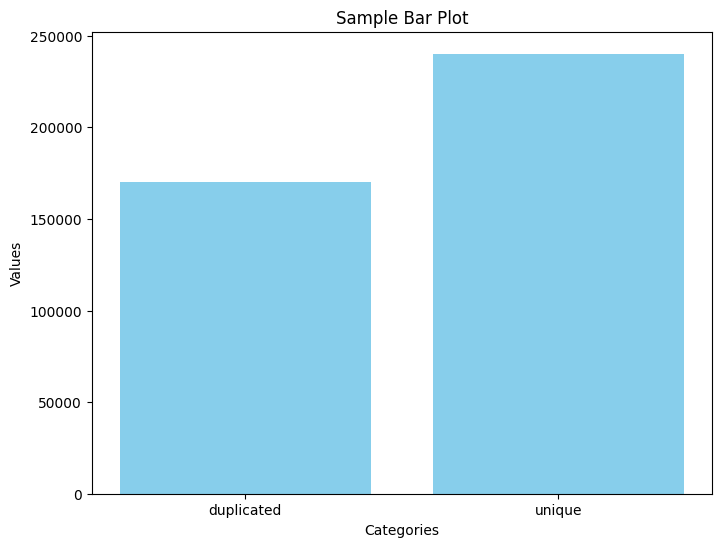

In [33]:
data = {}
data['duplicated'] = len(duplicatedTedCanId)
data['unique'] = len(notDuplicatedTedCanId)
plot_duplicated(data)

In [34]:
def plot_value_count_hist(value_counts, field):
    if len(value_counts) > 0:
        # Plotting using matplotlib
        plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
        value_counts.plot(kind='bar')
        plt.title(f'Value Counts of {field}')
        plt.xlabel('Unique Values')
        plt.ylabel('Counts')
        plt.show()
    else:
        print("Empty counts")

In [35]:
tedCanIdCountsByValue[tedCanIdCountsByValue>200].values

array([883, 878, 868, 867, 787, 746, 707, 675, 674, 617, 613, 587, 576,
       557, 530, 529, 527, 519, 511, 501, 490, 489, 486, 485, 485, 469,
       463, 431, 422, 416, 405, 382, 344, 334, 334, 332, 325, 324, 314,
       305, 304, 304, 303, 301, 300, 298, 294, 292, 288, 283, 283, 280,
       276, 276, 275, 275, 274, 272, 266, 265, 261, 260, 258, 255, 255,
       251, 249, 249, 248, 244, 244, 244, 243, 242, 242, 238, 236, 236,
       233, 232, 232, 231, 231, 227, 225, 225, 224, 223, 222, 222, 221,
       219, 218, 217, 215, 215, 214, 212, 212, 211, 211, 210, 206, 205,
       204, 202, 202, 202, 201])

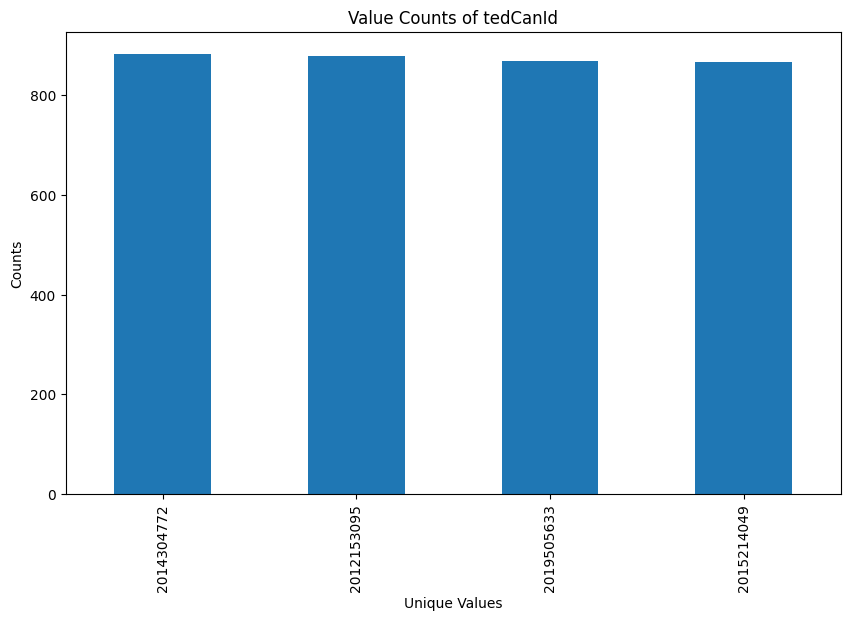

In [36]:
plot_value_count_hist(tedCanIdCountsByValue[tedCanIdCountsByValue > 800], 'tedCanId')

## correctionsNb Column 

Number of correction notices published for the lot.

In [37]:
correctionsNB = lots['correctionsNb']

### types

In [38]:
correctionsNB.dtype

dtype('int64')

In [39]:
correctionsNB

0          0
1          0
2          0
3          0
4          0
          ..
1380960    0
1380961    0
1380962    0
1380963    0
1380964    0
Name: correctionsNb, Length: 1380965, dtype: int64

In [40]:
correctionsNB.value_counts()

correctionsNb
0    1375786
1       5089
2         90
Name: count, dtype: int64

We can see that this column is a **numerical** field encoded as **64 bits integer**

We can see that the values for correctionsNB are ranging from **0-2** so there is really no need to really use 64 bits for this, 32 bits will be sufficient

But the choice of a numerical field for a counter is a good choice

### Missing values

In [41]:
correctionsNB.isna().sum()

0

We can see that we do not have missing values for this field

### Duplicated values

In [42]:
correctionsNBCountByValue = correctionsNB.value_counts()

In [43]:
correctionsNBCountByValue

correctionsNb
0    1375786
1       5089
2         90
Name: count, dtype: int64

In [44]:
dict(correctionsNBCountByValue)

{0: 1375786, 1: 5089, 2: 90}

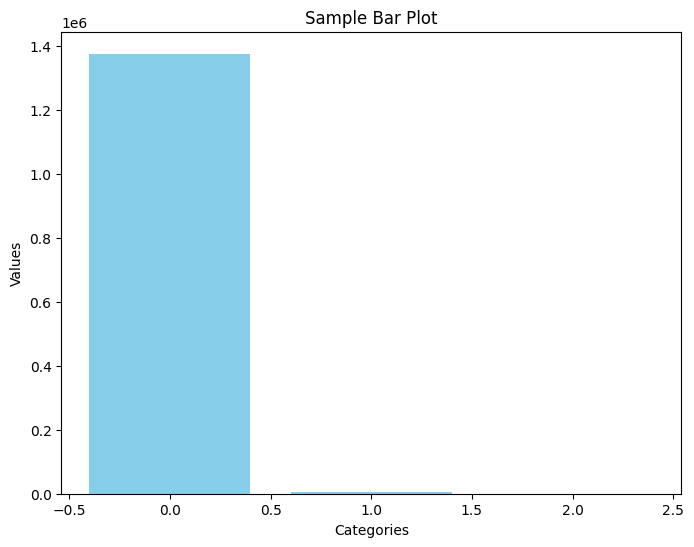

In [45]:
data = dict(correctionsNBCountByValue)
plot_duplicated(data)

In [46]:
(data[0] / len(correctionsNB))*100

99.62497239249366

In [47]:
(data[1] / len(correctionsNB))*100

0.36851042568059295

In [48]:
(data[2] / len(correctionsNB))*100

0.006517181825752282

We can see that **99%** of the lots doesn't haven't been updated

### Statistics

In [49]:
correctionsNB.describe()

count    1.380965e+06
mean     3.815448e-03
std      6.269958e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: correctionsNb, dtype: float64

We can the **maximum** number of updates is **2** and the **minimum** is **0**

## cancelled Column 

Boolean value indicating whether the lot was cancelled.

In [50]:
cancelled = lots['cancelled']

In [51]:
### types

In [52]:
cancelled.dtype

dtype('int64')

In [53]:
cancelled

0          0
1          0
2          0
3          0
4          0
          ..
1380960    0
1380961    0
1380962    0
1380963    0
1380964    0
Name: cancelled, Length: 1380965, dtype: int64

In [54]:
cancelled.value_counts()

cancelled
0    1380685
1        280
Name: count, dtype: int64

We can see that this field is a **numerical** field encoded as **64 bits integer**

The choice of an integer is not a good one because we only have **True** or **False**. A better choice would be to have a **boolean** type

### Missing values

In [55]:
cancelled.isna().sum()

0

There is no missing value for this column

### Duplicated values

In [56]:
cancelledCountByValue = cancelled.value_counts()

In [57]:
cancelledCountByValue

cancelled
0    1380685
1        280
Name: count, dtype: int64

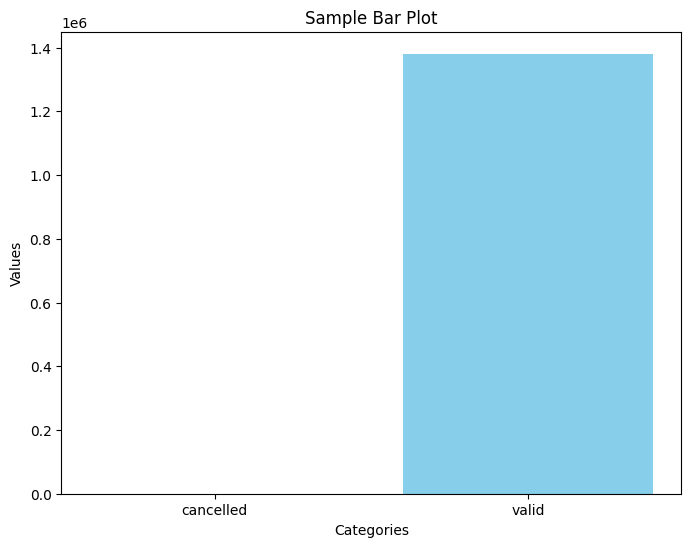

In [58]:
data = {'cancelled': cancelledCountByValue[1], 'valid': cancelledCountByValue[0]}
plot_duplicated(data)

In [59]:
(data['valid'] / len(cancelled))*100

99.97972432320877

In [60]:
(data['cancelled'] / len(cancelled))*100

0.02027567679122932

We can see that only few of lots are cancelled

## awardDate Column

The date the lot was awarded.

In [61]:
awardDate = lots['awardDate']

### types

In [62]:
awardDate.dtype

dtype('O')

In [63]:
awardDate

0          2009-09-24
1          2009-09-24
2          2009-09-24
3          2009-09-28
4          2009-11-06
              ...    
1380960    2020-12-28
1380961    2020-12-10
1380962    2020-12-17
1380963    2020-12-11
1380964    2020-12-23
Name: awardDate, Length: 1380965, dtype: object

we can see that this is numerical column encoded as date

This choice is a good one

### Missing values

In [64]:
missingAwardDateCount = awardDate.isna().sum()

In [65]:
missingAwardDateCount

186671

In [66]:
(missingAwardDateCount / len(awardDate))*100

13.517431651055603

In [67]:
correctAwardDateCount = len(awardDate) - missingAwardDateCount

In [68]:
correctAwardDateCount

1194294

In [69]:
(correctAwardDateCount / len(awardDate))*100

86.4825683489444

We can see that **14%** of the awardDate are missing and **86%** are not

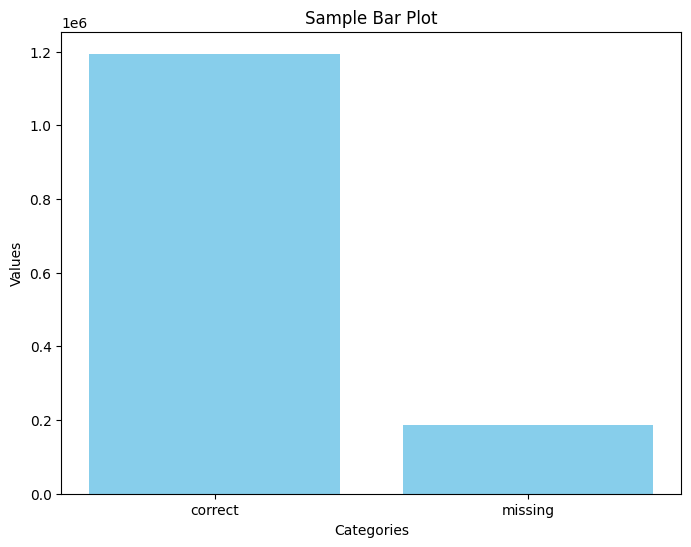

In [70]:
data = {'correct': correctAwardDateCount, 'missing': missingAwardDateCount}
plot_duplicated(data)

In [71]:
cancelledLot = lots[lots['cancelled']==1]

In [72]:
cancelledLot

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
183789,183789,2011138910,0,1,2011-04-28,NaN,43945.0,79620000.0,13.0,N,...,NaN,NaN,N,NaN,NaN,S,OPE,NaN,36.0,44.0
196730,196730,2011187973,0,1,2011-02-15,NaN,670597.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196731,196731,2011187973,0,1,2011-02-15,NaN,731458.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196732,196732,2011187973,0,1,2011-02-15,NaN,197837.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196733,196733,2011187973,0,1,2011-02-15,NaN,566920.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873672,873672,2016434610,0,1,2016-12-02,NaN,38565.1,50500000.0,4.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873673,873673,2016434610,0,1,2016-12-02,NaN,53244.0,50500000.0,6.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873674,873674,2016434610,0,1,2016-12-02,NaN,11629.1,50500000.0,4.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873675,873675,2016434610,0,1,2016-12-02,NaN,29836.8,50500000.0,5.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0


In [73]:
len(cancelledLot)

280

In [74]:
dict(cancelledCountByValue)[1]

280

In [75]:
cancelledLotNotAwarded = cancelledLot[cancelledLot['awardDate'].isna()]

In [76]:
cancelledLotNotAwarded

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
261119,261119,2011390174,0,1,NaN,NaN,NaN,22113000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,NaN,NaN
318484,318484,2012137194,0,1,NaN,NaN,5135.6,33000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,30.03,45.0
318485,318485,2012137194,0,1,NaN,NaN,188069.7,33000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,30.03,45.0
318486,318486,2012137194,0,1,NaN,NaN,121227.0,33000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,30.03,45.0
318487,318487,2012137194,0,1,NaN,NaN,24570.0,33000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,30.03,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732377,732377,2015303878,0,1,NaN,NaN,NaN,45000000.0,NaN,N,...,NaN,NaN,NaN,NaN,NaN,W,OPE,Y,15.00,42.0
784213,784213,201632275,0,1,NaN,NaN,NaN,77340000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,S,NOC,NaN,NaN,NaN
784214,784214,201632275,0,1,NaN,NaN,NaN,77340000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,S,NOC,NaN,NaN,NaN
784215,784215,201632275,0,1,NaN,NaN,NaN,77340000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,S,NOC,NaN,NaN,NaN


In [77]:
(len(cancelledLotNotAwarded) / len(cancelledLot)) * 100

22.857142857142858

In [78]:
cancelledLotAwarded = cancelledLot[cancelledLot['awardDate'].notna()]

In [79]:
cancelledLotAwarded

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
183789,183789,2011138910,0,1,2011-04-28,NaN,43945.0,79620000.0,13.0,N,...,NaN,NaN,N,NaN,NaN,S,OPE,NaN,36.0,44.0
196730,196730,2011187973,0,1,2011-02-15,NaN,670597.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196731,196731,2011187973,0,1,2011-02-15,NaN,731458.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196732,196732,2011187973,0,1,2011-02-15,NaN,197837.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
196733,196733,2011187973,0,1,2011-02-15,NaN,566920.0,33696500.0,52.0,N,...,NaN,NaN,N,NaN,NaN,U,OPE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873672,873672,2016434610,0,1,2016-12-02,NaN,38565.1,50500000.0,4.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873673,873673,2016434610,0,1,2016-12-02,NaN,53244.0,50500000.0,6.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873674,873674,2016434610,0,1,2016-12-02,NaN,11629.1,50500000.0,4.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0
873675,873675,2016434610,0,1,2016-12-02,NaN,29836.8,50500000.0,5.0,N,...,NaN,NaN,NaN,NaN,NaN,S,OPE,NaN,60.0,37.0


In [80]:
(len(cancelledLotAwarded) / len(cancelledLot)) * 100

77.14285714285715

We can also see that from cancelled lots  **23%** have **awardDate** what means they are awarded and **77%** are note

In [81]:
notCancelledLot = lots[lots['cancelled']==0]

In [82]:
notCancelledLot

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
0,0,2010142,0,0,2009-09-24,NaN,8.916747e+05,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
1,1,2010142,0,0,2009-09-24,NaN,1.169251e+05,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
2,2,2010142,0,0,2009-09-24,NaN,7.381412e+04,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
3,3,2010143,0,0,2009-09-28,NaN,3.840584e+05,45232150.0,11.0,NaN,...,NaN,NaN,NaN,N,NaN,W,OPE,NaN,NaN,NaN
4,4,2010144,0,0,2009-11-06,NaN,7.790000e+06,45211000.0,6.0,NaN,...,NaN,NaN,N,N,NaN,W,RES,NaN,24.01,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380960,1380960,2020643360,0,0,2020-12-28,NaN,5.000000e+05,92200000.0,2.0,N,...,Y,NaN,NaN,NaN,N,S,NIC,NaN,96.00,35.0
1380961,1380961,2020643361,0,0,2020-12-10,NaN,2.000000e+07,65111000.0,2.0,N,...,N,NaN,NaN,NaN,N,S,NIC,NaN,NaN,62.0
1380962,1380962,2020643362,0,0,2020-12-17,NaN,4.984029e+06,85312110.0,3.0,N,...,N,NaN,NaN,NaN,N,S,NIC,NaN,60.00,35.0
1380963,1380963,2020643363,0,0,2020-12-11,497000000.0,4.970000e+08,65300000.0,1.0,N,...,N---N,NaN,NaN,NaN,N,S,NOC,NaN,NaN,NaN


In [83]:
notCancelledLotAwarded = notCancelledLot[notCancelledLot['awardDate'].notna()]

In [84]:
notCancelledLotAwarded

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
0,0,2010142,0,0,2009-09-24,NaN,8.916747e+05,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
1,1,2010142,0,0,2009-09-24,NaN,1.169251e+05,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
2,2,2010142,0,0,2009-09-24,NaN,7.381412e+04,45233226.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,NaN,NaN
3,3,2010143,0,0,2009-09-28,NaN,3.840584e+05,45232150.0,11.0,NaN,...,NaN,NaN,NaN,N,NaN,W,OPE,NaN,NaN,NaN
4,4,2010144,0,0,2009-11-06,NaN,7.790000e+06,45211000.0,6.0,NaN,...,NaN,NaN,N,N,NaN,W,RES,NaN,24.01,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380960,1380960,2020643360,0,0,2020-12-28,NaN,5.000000e+05,92200000.0,2.0,N,...,Y,NaN,NaN,NaN,N,S,NIC,NaN,96.00,35.0
1380961,1380961,2020643361,0,0,2020-12-10,NaN,2.000000e+07,65111000.0,2.0,N,...,N,NaN,NaN,NaN,N,S,NIC,NaN,NaN,62.0
1380962,1380962,2020643362,0,0,2020-12-17,NaN,4.984029e+06,85312110.0,3.0,N,...,N,NaN,NaN,NaN,N,S,NIC,NaN,60.00,35.0
1380963,1380963,2020643363,0,0,2020-12-11,497000000.0,4.970000e+08,65300000.0,1.0,N,...,N---N,NaN,NaN,NaN,N,S,NOC,NaN,NaN,NaN


In [85]:
(len(notCancelledLotAwarded) / len(notCancelledLot))*100

86.48446242263805

In [86]:
notCancelledLotNotAwarded = notCancelledLot[notCancelledLot['awardDate'].isna()]

In [87]:
notCancelledLotNotAwarded

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
22,22,2010169,0,0,NaN,NaN,NaN,34330000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,NaN,NaN
23,23,2010169,0,0,NaN,NaN,NaN,34330000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,NaN,NaN
29,29,2010176,0,0,NaN,NaN,20307.86,39830000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,NaN,NaN
30,30,2010176,0,0,NaN,NaN,162770.73,39830000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,NaN,NaN
31,31,2010176,0,0,NaN,NaN,2993.25,39830000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380835,1380835,2020642910,0,0,NaN,NaN,0.00,55521200.0,NaN,N,...,NaN,NaN,NaN,NaN,N,S,OPE,NaN,48.0,31.0
1380837,1380837,2020642910,0,0,NaN,NaN,0.00,55521200.0,NaN,N,...,NaN,NaN,NaN,NaN,N,S,OPE,NaN,48.0,31.0
1380838,1380838,2020642910,0,0,NaN,NaN,0.00,55521200.0,NaN,N,...,NaN,NaN,NaN,NaN,N,S,OPE,NaN,48.0,31.0
1380840,1380840,2020642910,0,0,NaN,NaN,0.00,55521200.0,NaN,N,...,NaN,NaN,NaN,NaN,N,S,OPE,NaN,48.0,31.0


In [88]:
(len(notCancelledLotNotAwarded) / len(notCancelledLot))*100

13.515537577361961

We can see that from not cancelled lots only **14%** are not awarded

The reason for this could be an error or they were awarded after 2020 (we need to check other vlaues to make sure)

## awardEstimatedPrice Column

estimation of the value of the lot, according to the contract notice.

In [89]:
awardEstimatedPrice = lots['awardEstimatedPrice']

### Type

In [90]:
awardEstimatedPrice.dtype

dtype('float64')

In [91]:
awardEstimatedPrice.max()

99999999999.0

In [92]:
np.finfo(np.float64).max

1.7976931348623157e+308

In [93]:
np.finfo(np.float32).max

3.4028235e+38

In [94]:
awardEstimatedPrice

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
1380960            NaN
1380961            NaN
1380962            NaN
1380963    497000000.0
1380964            1.0
Name: awardEstimatedPrice, Length: 1380965, dtype: float64

Here we can see that we have a **numerical** value encoded as **64 bits float**

The choice of a float for the price is a good choice.

For the choice of 64 bits, since for our case we don't really need it because the max is less than the max of float on 32 bits

### Missing values

In [95]:
missingAwardEstimatedCount = awardEstimatedPrice.isna().sum()

In [96]:
missingAwardEstimatedCount

1191352

In [97]:
(missingAwardEstimatedCount / len(awardEstimatedPrice)) * 100

86.2695289163737

In [98]:
notMissingAwardEstimatedCount = len(awardEstimatedPrice) - missingAwardEstimatedCount

In [99]:
notMissingAwardEstimatedCount

189613

In [100]:
(notMissingAwardEstimatedCount / len(awardEstimatedPrice)) * 100

13.730471083626306

We can see that only **14%** of awardEstimatedPrice are not missing and **86%** are missing

### Statistics

In [101]:
awardEstimatedPrice.describe()

count    1.896130e+05
mean     3.043616e+06
std      3.283510e+08
min      1.000000e-02
25%      2.363400e+04
50%      1.000000e+05
75%      3.798957e+05
max      1.000000e+11
Name: awardEstimatedPrice, dtype: float64

In [102]:
awardEstimatedPrice.min()

0.01

We can see that the mean value of awardEstimatedPrice is **0.01**, this value is abberant because a low value for a lot can't exist

In [103]:
awardEstimatedPrice.max()

99999999999.0

Here we can also see that the max is the repetition of **9** it must be an error

### Aberrant value detection

We are going to use **IQR** (InterQuartile Range) method

**Q1**: first quartile

**Q3** third quartile

**IQR** = Q3 - Q1

**Valid values** \[ Q1 - 1.5 * IQR, Q3 + 1.5 * IQR \]

In [104]:
notMissingAwardEstimatedPrice = lots[lots['awardEstimatedPrice'].notna()]

In [105]:
Q1 = notMissingAwardEstimatedPrice['awardEstimatedPrice'].quantile(0.25)
Q3 = notMissingAwardEstimatedPrice['awardEstimatedPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [106]:
upper_bound

914288.1499999999

In [107]:
lower_bound

-510758.49

In [108]:
criteria = (notMissingAwardEstimatedPrice['awardEstimatedPrice'] < lower_bound) | (notMissingAwardEstimatedPrice['awardEstimatedPrice'] > upper_bound)
abberantAwardEstimatedPrice = notMissingAwardEstimatedPrice[criteria]

In [109]:
abberantAwardEstimatedPrice

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
72,72,2010220,0,0,2009-11-24,9.209614e+05,9.209614e+05,33141120.0,33.0,N,...,NaN,NaN,NaN,N,NaN,U,OPE,NaN,36.00,41.0
746,746,20101228,0,0,2009-12-30,1.055000e+06,1.055000e+06,50750000.0,3.0,N,...,NaN,NaN,N,Y,NaN,S,NIC,NaN,11.97,46.0
753,753,20101238,0,0,2009-11-27,3.500000e+06,3.500000e+06,32412000.0,2.0,N,...,NaN,NaN,Y,Y,NaN,S,OPE,NaN,NaN,NaN
781,781,20101265,0,0,2009-12-22,3.929766e+06,3.929766e+06,73435000.0,2.0,N,...,NaN,NaN,N,N,NaN,S,NOC,NaN,NaN,NaN
783,783,20101267,0,0,2009-12-16,2.800000e+06,2.851159e+06,73435000.0,5.0,N,...,NaN,NaN,N,NaN,NaN,S,NOC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380668,1380668,2020642316,0,0,2020-11-26,1.032000e+06,1.032000e+06,90500000.0,1.0,N,...,N,NaN,N,N,N,S,OPE,Y,12.00,43.0
1380680,1380680,2020642335,0,0,2020-12-22,5.270000e+06,2.893864e+06,72000000.0,5.0,N,...,N,2.0,Y,Y,N,S,OPE,Y,24.00,42.0
1380825,1380825,2020642892,0,0,2020-12-22,2.056443e+06,2.365077e+06,55521100.0,2.0,N,...,Y,NaN,N,NaN,N,S,OPE,NaN,12.00,43.0
1380959,1380959,2020643347,0,0,2020-07-02,6.000000e+06,8.162090e+06,45211360.0,5.0,N,...,Y,NaN,NaN,N,N,W,NIC,NaN,96.00,60.0


In [110]:
correctAwardEstimatedPrice = lots[(lots['awardEstimatedPrice'] >= lower_bound) & (lots['awardEstimatedPrice'] <= upper_bound)]

We can see this is not a good method to find abberant values for our case

In [111]:
criteria = notMissingAwardEstimatedPrice['awardEstimatedPrice'] <= 1
abberant1 = notMissingAwardEstimatedPrice[criteria]

In [112]:
abberant1

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
30645,30645,201060772,0,0,2010-01-14,1.00,1.00,32323500.0,2.0,N,...,NaN,NaN,NaN,Y,NaN,W,OPE,NaN,12.0,50.0
72208,72208,2010196647,0,0,2010-06-23,1.00,1.00,31700000.0,5.0,N,...,NaN,NaN,N,N,NaN,U,NIC,NaN,180.0,26.0
84783,84783,2010234775,0,0,2010-06-23,1.00,1.00,31700000.0,5.0,NaN,...,NaN,NaN,N,N,NaN,S,NIC,NaN,NaN,NaN
129990,129990,2010385028,0,0,2010-12-07,0.60,0.60,39550000.0,11.0,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,48.0,83.0
129991,129991,2010385028,0,0,2010-12-07,0.21,0.21,39550000.0,11.0,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,48.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378559,1378559,2020633858,0,0,2020-12-01,1.00,1.00,65310000.0,1.0,N,...,N,NaN,NaN,NaN,N,S,NOC,NaN,NaN,NaN
1379724,1379724,2020638855,0,0,2020-12-11,1.00,1.00,50313000.0,1.0,N,...,Y,NaN,Y,Y,N,S,NIC,Y,12.0,31.0
1379773,1379773,2020638947,0,0,2020-11-27,1.00,1.00,75242110.0,4.0,N,...,N,NaN,N,NaN,N,S,NIC,NaN,36.0,45.0
1379774,1379774,2020638947,0,0,2020-11-27,1.00,1.00,75242110.0,4.0,N,...,N,NaN,N,NaN,N,S,NIC,NaN,36.0,45.0


In [113]:
criteria = notMissingAwardEstimatedPrice['awardEstimatedPrice'] >= 99999999999.0
abberant2 = notMissingAwardEstimatedPrice[criteria]

In [114]:
abberant2

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
1121760,1121760,2018509991,0,0,2018-08-21,1.000000e+11,9.999999e+06,9134000.0,3.0,N,...,Y,NaN,N,Y,N,U,OPE,N,48.00,32.0
1148177,1148177,201932165,0,0,2018-12-26,1.000000e+11,1.000000e+11,66512000.0,4.0,N,...,N,NaN,N,Y,N,S,OPE,N,60.03,40.0


In [115]:
notMissingAwardEstimatedPrice['awardEstimatedPrice'].value_counts()

awardEstimatedPrice
2.000000e+05    2415
1.000000e+05    2135
4.000000e+05    1911
4.000000e+04    1775
5.000000e+04    1712
                ... 
4.107470e+05       1
2.124253e+06       1
8.587725e+06       1
4.125370e+03       1
4.970000e+08       1
Name: count, Length: 78365, dtype: int64

In [116]:
notMissingAwardEstimatedPrice['awardEstimatedPrice'].min()

0.01

In [118]:
notMissingAwardEstimatedPrice['awardEstimatedPrice'].max()

'99999999999.0'

In [122]:
def float_to_int(x):
    decimal_count = len(str(x).split('.')[1])
    multiplier = 10 ** decimal_count
    return int(x * multiplier)

In [123]:
tmp = notMissingAwardEstimatedPrice.copy()
tmp['awardEstimatedPrice'] = tmp['awardEstimatedPrice'].apply(float_to_int)

In [126]:
pattern = r'^(\d)\1+$'
tmp1 = tmp[tmp['awardEstimatedPrice'].astype(int).astype(str).str.match(pattern)]

In [127]:
tmp1.index

Index([  24528,  105278,  113851,  251636,  303463,  322389,  338267,  361370,
        374924,  381282,
       ...
       1336914, 1336915, 1336916, 1336917, 1336918, 1336919, 1336920, 1336921,
       1361213, 1376091],
      dtype='int64', length=164)

In [129]:
tmp2 = notMissingAwardEstimatedPrice.copy()

In [131]:
tmp3 = tmp2[tmp2.index.isin(tmp1.index)]

In [132]:
tmp1

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
24528,24528,201042538,0,0,2009-10-01,3333333,33333.33,71210000.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,S,RES,NaN,NaN,NaN
105278,105278,2010300144,0,0,2010-09-17,55,5.50,33751000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,NaN,42.0
113851,113851,2010333780,0,0,2010-06-01,99,19.80,33600000.0,1.0,N,...,NaN,NaN,N,Y,NaN,U,NOC,NaN,NaN,NaN
251636,251636,2011364715,0,0,2011-09-27,33,0.33,66000000.0,NaN,N,...,NaN,NaN,N,NaN,NaN,S,OPE,NaN,48.03,76.0
303463,303463,201284041,0,0,2012-02-17,88,8.80,33000000.0,NaN,N,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,24.01,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336919,1336919,2020379090,0,0,2020-07-16,2222222,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1336920,1336920,2020379090,0,0,2020-07-16,2222222,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1336921,1336921,2020379090,0,0,2020-07-16,2222222,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1361213,1361213,2020540938,0,0,2020-11-05,33333333,93272.81,66516000.0,3.0,N,...,N---N,NaN,N,Y,N,S,OPE,N,60.00,42.0


In [133]:
tmp3

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
24528,24528,201042538,0,0,2009-10-01,33333.33,33333.33,71210000.0,NaN,NaN,...,NaN,NaN,NaN,Y,NaN,S,RES,NaN,NaN,NaN
105278,105278,2010300144,0,0,2010-09-17,5.50,5.50,33751000.0,NaN,N,...,NaN,NaN,NaN,Y,NaN,U,OPE,NaN,NaN,42.0
113851,113851,2010333780,0,0,2010-06-01,9.90,19.80,33600000.0,1.0,N,...,NaN,NaN,N,Y,NaN,U,NOC,NaN,NaN,NaN
251636,251636,2011364715,0,0,2011-09-27,0.33,0.33,66000000.0,NaN,N,...,NaN,NaN,N,NaN,NaN,S,OPE,NaN,48.03,76.0
303463,303463,201284041,0,0,2012-02-17,8.80,8.80,33000000.0,NaN,N,...,NaN,NaN,NaN,NaN,NaN,U,OPE,NaN,24.01,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336919,1336919,2020379090,0,0,2020-07-16,22222.22,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1336920,1336920,2020379090,0,0,2020-07-16,22222.22,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1336921,1336921,2020379090,0,0,2020-07-16,22222.22,22222.22,15800000.0,1.0,N,...,N,NaN,N,Y,N,U,OPE,N,48.03,41.0
1361213,1361213,2020540938,0,0,2020-11-05,333333.33,93272.81,66516000.0,3.0,N,...,N---N,NaN,N,Y,N,S,OPE,N,60.00,42.0


In [134]:
lots.columns

Index(['lotId', 'tedCanId', 'correctionsNb', 'cancelled', 'awardDate',
       'awardEstimatedPrice', 'awardPrice', 'cpv', 'numberTenders', 'onBehalf',
       'jointProcurement', 'fraAgreement', 'fraEstimated', 'lotsNumber',
       'accelerated', 'outOfDirectives', 'contractorSme', 'numberTendersSme',
       'subContracted', 'gpa', 'multipleCae', 'typeOfContract', 'topType',
       'renewal', 'contractDuration', 'publicityDuration'],
      dtype='object')

## awardPrice Column

value of the lot in the award notice

In [135]:
awardPrice = lots['awardPrice']

In [136]:
awardPrice.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1380965 entries, 0 to 1380964
Series name: awardPrice
Non-Null Count   Dtype  
--------------   -----  
954642 non-null  float64
dtypes: float64(1)
memory usage: 10.5 MB


In [ ]:
## numberTenders Column

In [ ]:
## onBehalf Column

In [ ]:
## jointProcurement Column

In [ ]:
## fraAgreement Column

In [ ]:
## fraEstimated Column

In [ ]:
## lotsNumber Column

In [ ]:
## accelerated Column

In [ ]:
## outOfDirectives Column

In [ ]:
## contractorSme Column

In [ ]:
## numberTendersSme Column

In [ ]:
## subContracted Column

In [ ]:
## subContracted Column

In [ ]:
## gpa Column

In [ ]:
## multipleCae Column

In [ ]:
## typeOfContract Column

In [ ]:
## topType Column

In [ ]:
## renewal Column

In [ ]:
## contractDuration Column

In [ ]:
## publicityDuration Column